In [34]:
import matplotlib.pyplot as plt

import numpy as np
import glob

import pandas as pd

from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import applications

In [35]:
img_height = img_width = 150
channels = 3
if (channels == 1):
    color_mode_ = "grayscale"
else:
    color_mode_ = "rgb"

In [36]:
data1 = pd.read_csv('/data/data_fakemotion_train_text/data_new.csv')
data2 = pd.read_csv('/data/new_data1/new_data1.csv').drop('Unnamed: 0', axis=1)
data3 = pd.read_csv('/data/new_data2/new_data2.csv').drop('Unnamed: 0', axis=1)
data4 = pd.read_csv('/data/new_data3/new_data3.csv').drop('Unnamed: 0', axis=1)
data5 = pd.read_csv('/data/new_data4/new_data4.csv').drop('Unnamed: 0', axis=1)
data6 = pd.read_csv('/data/new_data5/new_data5.csv').drop('Unnamed: 0', axis=1)
data = pd.concat([data1,data2,data3,data4,data5,data6], ignore_index=True)

In [37]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [38]:
data = data.drop(data[data.emotion == 6].index.values)
data = data.drop(data[data.emotion == 2].index.values)

In [39]:
data = data.replace({'emotion': {5: 2}})

In [40]:
len(data)

24568

In [41]:
data.shape

(24568, 3)

In [42]:
img_width, img_height = 48, 48

datapoints = data['pixels'].tolist()

#getting features for training
X = []
for xseq in datapoints:
    xx = [int(xp) for xp in xseq.split(' ')]
    xx = np.asarray(xx).reshape(img_width, img_height)
    X.append(xx.astype('float32'))

X = np.asarray(X)
X = np.expand_dims(X, -1)

#getting labels for training
# y = pd.get_dummies(data['emotion']).as_matrix()
y = data.emotion

#reducing
# X = X[:5000]
# y = y[:5000]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# X_train, y_train = X[:22000], y[:22000]
# X_test, y_test = X[22000:], y[22000:]

In [45]:
import cv2
Xtrain = []
for i in range(len(X_train)):
    Xtrain.append(cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB))
X_train = np.array(Xtrain)

Xtest = []
for i in range(len(X_test)):
    Xtest.append(cv2.cvtColor(X_test[i],cv2.COLOR_GRAY2RGB))
X_test = np.array(Xtest)

In [46]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 5)
y_test = np_utils.to_categorical(y_test, 5)

In [47]:
X_train.shape

(19654, 48, 48, 3)

In [48]:
X_train[0].shape

(48, 48, 3)

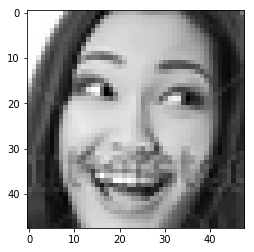

In [49]:
plt.imshow(X_train[0]/255)

In [50]:
y_train.shape

(19654, 5)

In [51]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-wu493dk5
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-wu493dk5
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8310 sha256=8bbedde4c8550bcdd744f56768ed017f0cf48e915384ebfe70ee72c7c9f494df
  Stored in directory: /tmp/pip-ephem-wheel-cache-_r8wvsn5/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface
You should consider upgrading via the 'pip install --upgrade pip' command.


In [52]:
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.vggface import VGGFace

#Load the VGG model
vgg_conv = VGGFace(include_top=False, input_shape=(img_width,img_height,channels))
print(len(vgg_conv.layers))
# Freeze some layers

# We freeze three layers
for layer in vgg_conv.layers[:-6]:
    layer.trainable = False
    pass


# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# we add a fully connected layer
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

# we compute the softmax according to 5 classes because we have 5 classes

predictions = model.add(Dense(output_dim = 5, activation = 'softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

19
<keras.engine.input_layer.InputLayer object at 0x7f7e11ed4518> False
<keras.layers.convolutional.Conv2D object at 0x7f7e11f3be10> False
<keras.layers.convolutional.Conv2D object at 0x7f7e11f3bdd8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e11efa320> False
<keras.layers.convolutional.Conv2D object at 0x7f7e11efaf60> False
<keras.layers.convolutional.Conv2D object at 0x7f7e11ea9ac8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e11ec93c8> False
<keras.layers.convolutional.Conv2D object at 0x7f7e11ec9d68> False
<keras.layers.convolutional.Conv2D object at 0x7f7e09c91e80> False
<keras.layers.convolutional.Conv2D object at 0x7f7e09c4f5f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e09c74400> False
<keras.layers.convolutional.Conv2D object at 0x7f7e09c74da0> False
<keras.layers.convolutional.Conv2D object at 0x7f7e09c12eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f7e09bd1630> True
<keras.layers.pooling.MaxPooling2D object at 0x7f7e09bf343

/opt/ds3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=5)`


In [53]:
# Compile the model
from keras import optimizers
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=100, epochs=80)

Epoch 1/80
19654/19654 [==============================] - 17s 845us/step - loss: 2.0068 - acc: 0.3537
Epoch 2/80
19654/19654 [==============================] - 15s 783us/step - loss: 1.5086 - acc: 0.3648
Epoch 3/80
19654/19654 [==============================] - 15s 783us/step - loss: 1.4614 - acc: 0.3647
Epoch 4/80
19654/19654 [==============================] - 15s 784us/step - loss: 1.4371 - acc: 0.3648
Epoch 5/80
19654/19654 [==============================] - 15s 783us/step - loss: 1.4285 - acc: 0.3646
Epoch 6/80
 3000/19654 [===>..........................] - ETA: 13s - loss: 1.4284 - acc: 0.3653

In [ ]:
# evaluate the model
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_lbl = []
y_test_lbl = []
for yp, yt in zip(y_pred, y_test):
    id_max_pred = np.argmax(yp)
    y_pred_lbl.append(id_max_pred)
    id_max_test = np.argmax(yt)
    y_test_lbl.append(id_max_test)

In [ ]:
y_test_lbl[:10]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_lbl, y_pred_lbl)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_lbl, y_pred_lbl)
print(cm)

In [ ]:
np.unique(np.array(y_pred_lbl))

In [ ]:
np.unique(np.array(y_test_lbl))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pred[:30,1])
plt.plot(y_pred[:30,0])

In [ ]:
# validation_datagen = ImageDataGenerator(rescale=1. / 255)

# # Change the batchsize according to your system RAM
# train_batchsize = 100
# val_batchsize = 10

# # train_generator = train_datagen.flow_from_directory(
# #     train_folder,
# #     target_size=(img_height, img_width),
# #     batch_size=train_batchsize,
# #     class_mode='categorical')


# train_generator = train_datagen.flow(X_train, y_train, batch_size=train_batchsize)

# # Compile the model
# model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# # validation_generator = validation_datagen.flow_from_directory(
# #     test_folder,
# #     target_size=(img_height, img_width),
# #     batch_size=val_batchsize,
# #     class_mode='categorical',
# #     shuffle=False)

# validation_generator = validation_datagen.flow(X_test, y_test, batch_size=val_batchsize)


# # Train the model
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=train_generator.n / train_generator.batch_size,
#     epochs=20)
# #     validation_data=validation_generator,
# #     validation_steps=validation_generator.n / validation_generator.batch_size,
# #     verbose=1)